In [1]:
from itertools import product
from scipy import stats
from scipy.special import gamma
from astropy import units as u
from astropy.cosmology import LambdaCDM
from astropy.constants import L_sun, c
import matplotlib as mpl
from astropy import units as u
from astropy.cosmology import LambdaCDM
mpl.use('pdf')
from seaborn import histplot, heatmap
cosmo = LambdaCDM(H0=100, Om0=0.3, 
                  Ode0=0.7)

In [47]:
Data2 = pd.read_csv('results27_14_8_55_72.csv', index_col='specid')
Data2 = Data2[(Data2['bmag'] > 0)  & (Data2['z_helio']>0)]

cosmo = LambdaCDM(H0=100, Om0=0.3, 
                  Ode0=0.7)
def D_C(z):
    return cosmo.comoving_distance(z).value

def D_L(z):
    return cosmo.luminosity_distance(z).value
Data2['D C/Mpc'] = Data2['z_helio'].map(D_C)
Data2['D L/Mpc'] = Data2['z_helio'].map(D_L)
Data2.columns = [idx.replace('_', ' ') for idx in Data2.columns]

def Mb(bmag, z):
    K = 2.6 * z + 4.3 * z ** 2
    mu = 5 * np.log10((cosmo.luminosity_distance(z).to(u.pc)/(10 * u.pc)).value)
    return bmag - mu - K
Data2['Mb'] = list(map(Mb, *Data2[['bmag', 'z helio']].values.T))
Data2['L rel to sun'] = Data2['Mb'].map(lambda Mb: 10 ** ((Mb- 5.31)/(-2.5)) * L_sun.to(u.erg/u.s).value)
def dVdz(z):
        return ((cosmo.differential_comoving_volume(z) * 17046 *u.deg**2).to(u.mpc**3)/((c/cosmo.H0)**3).to(u.mpc**3)).value
dVdz = np.vectorize(dVdz)
Data2.loc[:, 'dVdz'] = Data2['z helio'].map(dVdz)


UnitConversionError: 'Mpc3 s3 / km3' and 'mpc3' (volume) are not convertible

In [3]:
alpha = -0.5
L_star = 5.818219625543829e+43


In [4]:
l = np.linspace(1e2, 1e4, 100)
z = np.linspace(0.00001, 0.29, 100)
L, Z = np.meshgrid(l, z)
p_data = p(L, Z)

NameError: name 'p' is not defined

<IPython.core.display.Javascript object>


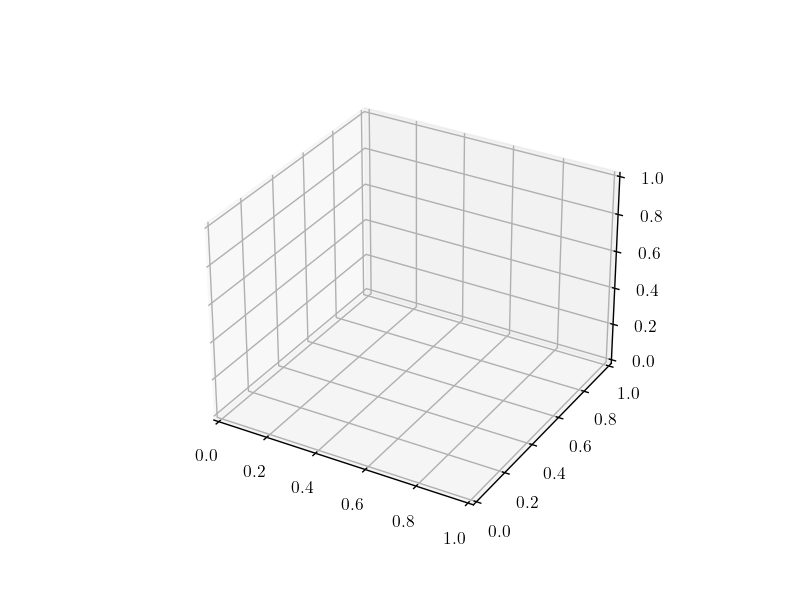

NameError: name 'L' is not defined

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(L, Z,  p_data, rstride=1, cstride=1, cmap='viridis')

(array([0.24829884, 0.56330482, 1.03025487, 1.67879661, 2.58304909,
        3.73189446, 5.1179208 , 5.73681491, 7.46749487, 8.9016986 ]),
 array([0.02015537, 0.04713899, 0.0741226 , 0.10110622, 0.12808983,
        0.15507345, 0.18205706, 0.20904067, 0.23602429, 0.2630079 ,
        0.28999152]),
 <BarContainer object of 10 artists>)

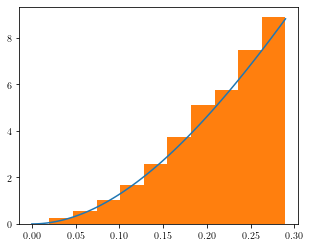

In [33]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(5, 4))
z = np.linspace(0, 0.29, 100)
dV = dVdz(z)
ax.plot(z, dV)
ax.hist(sample, density=True)

In [95]:
data

array([[7.96650209e-60, 2.38811557e-01],
       [7.96650209e-60, 2.89872136e-01],
       [7.96650209e-60, 9.06009444e-02],
       ...,
       [2.48834009e-95, 1.84786102e-01],
       [2.48834009e-95, 2.16732373e-01],
       [2.48834009e-95, 1.96644155e-01]])

In [16]:
np.random.uniform

In [21]:
dist.pdf

1.1927889781461889e-15

In [22]:
def p(L, z):
    Phi = (L/L_star) ** alpha * np.exp(-L/L_star) / (gamma(alpha + 1) * L_star)
    return Phi * dVdz(z)

In [25]:
from scipy.integrate import simpson

In [46]:
Z = np.linspace(0, 0.29876, 10000)
simpson(dVdz(Z), Z)

1.0000362631414856

In [6]:
alpha, L_star =-9.90000000e-01,  8.41544887e+09 * L_sun.to(u.erg / u.s).value
c = dVdz(0.290246)
dist = stats.gamma(alpha+1)
def p(L, z):
    Phi = (L/L_star) ** alpha * np.exp(-L/L_star) / (gamma(alpha + 1) * L_star)
    return Phi * dVdz(z)
def AceeptReject():
    global c
    global power
    while True:
        z = np.random.uniform(0, 0.290246)
        L = dist.rvs()
        y = np.random.uniform(0, 1)
        if y * c <= dVdz(z):
            return z
sample = [AceeptReject() for i in range(1000)]


#sample = np.linspace(0, 0.29, 100)



data = np.array([i for i in product(phi, sample)])

def mis(L, z):
    if 5.31 - 2.5 * np.log10(L/L_sun.to(u.erg/u.s).value) \
    + 5 * np.log10((cosmo.luminosity_distance(z).to(u.pc)/(10 * u.pc)).value) \
    + 2.6 * z + 4.3 * z ** 2 < 17:
        return True
    else:
        return False

Data = np.array([d  for d in data if mis(d[0] * L_star, d[1])])
Data = np.log10(Data[:, 0] * L_star)

data2 = Data2[(Data2['bmag'] < 17) & (Data2['z helio'] < 0.29) & (Data2['dVdz']>0)]

NameError: name 'L_sun' is not defined

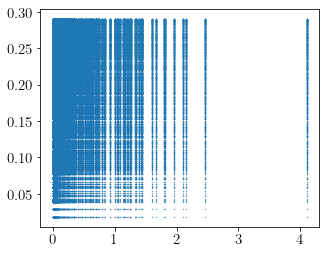

In [13]:
fig

In [14]:
sns.jointplot?

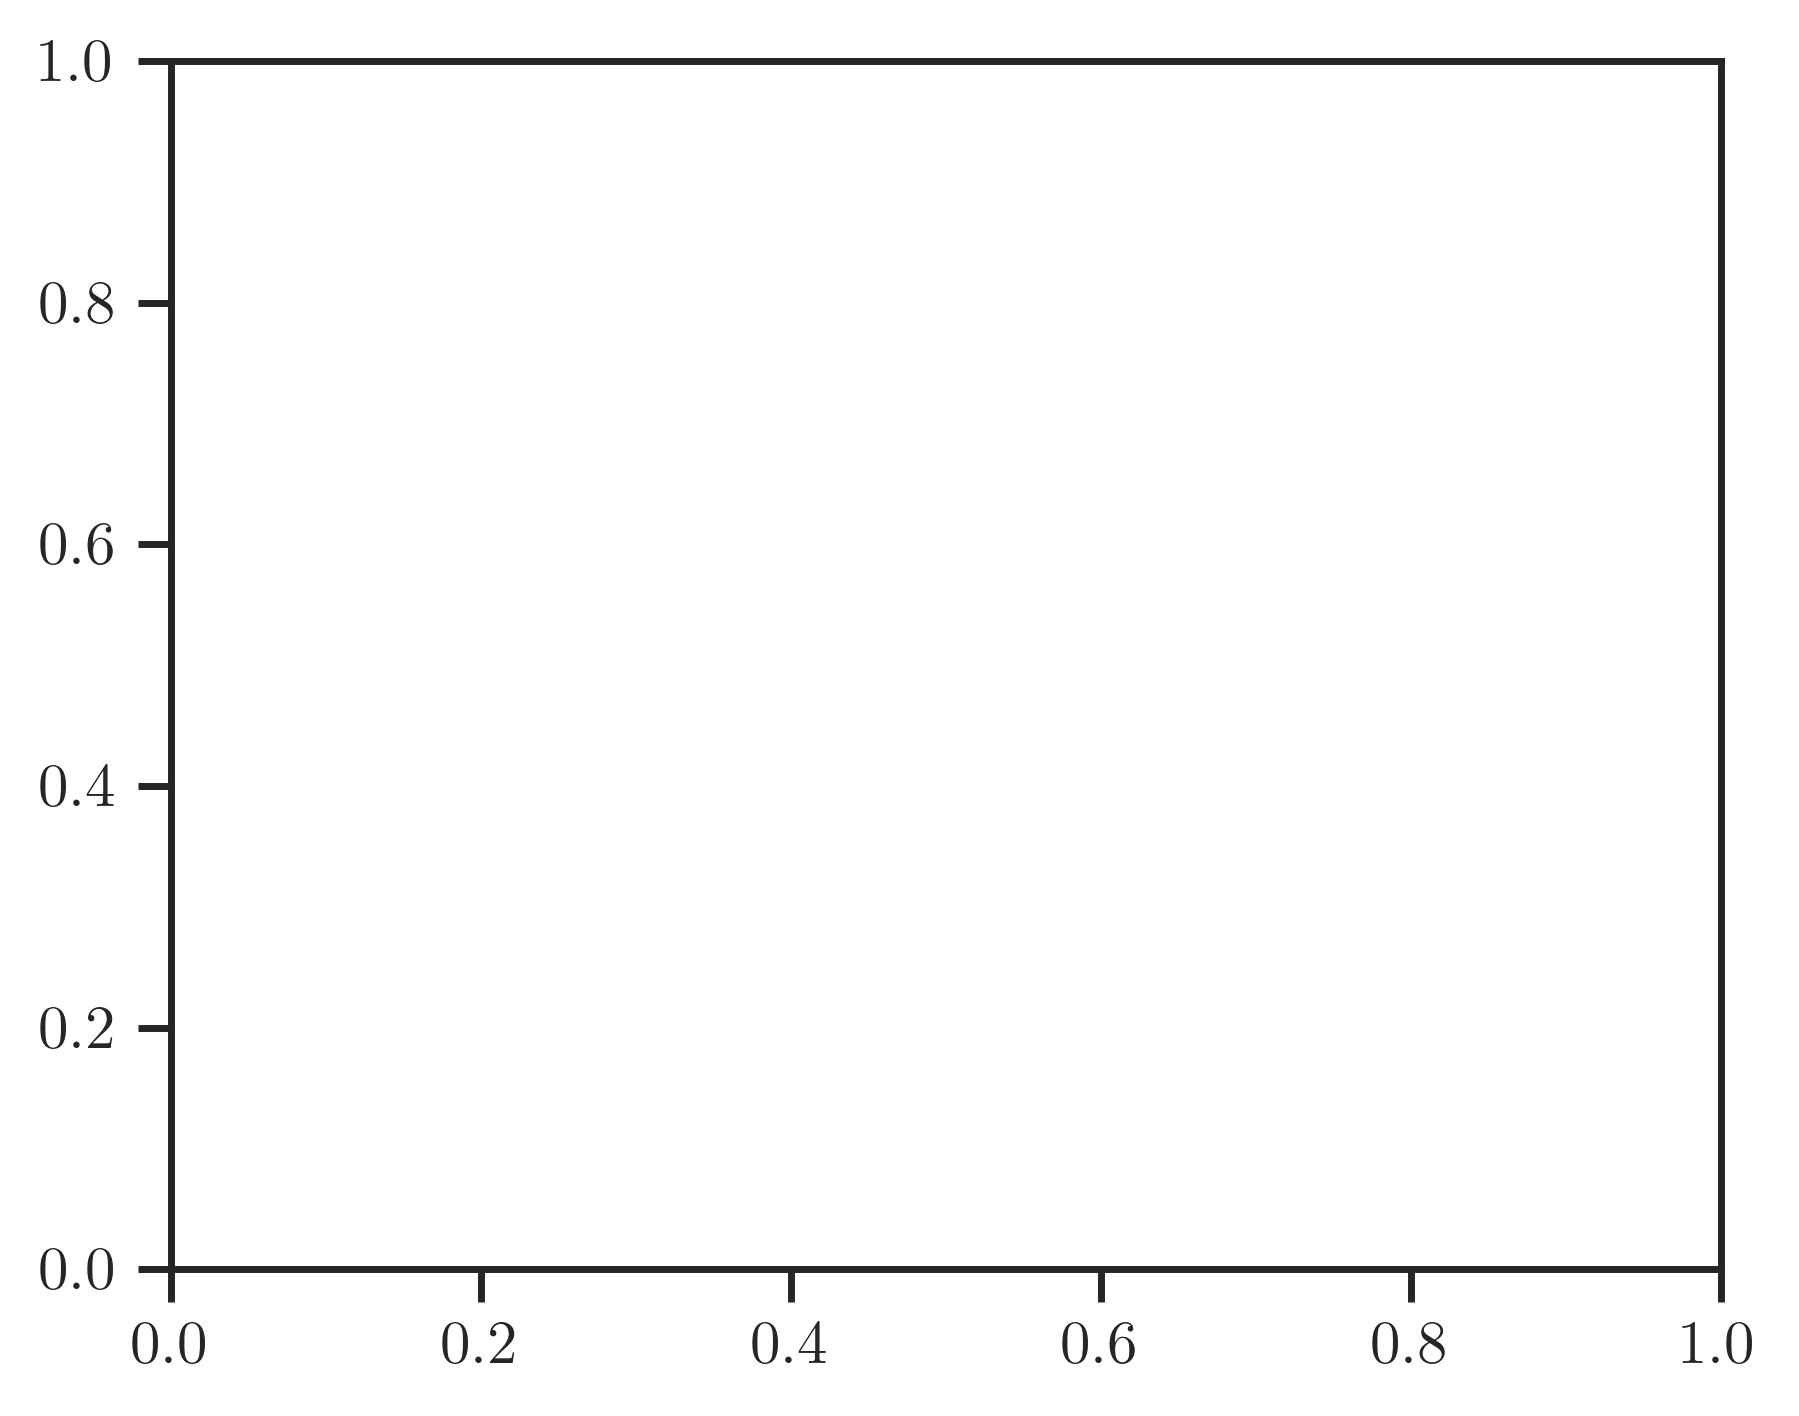

In [15]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.set_theme(style="ticks")
sns.jointplot(data=data, color="#4CB391", ax=ax)
fig

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<IPython.core.display.Javascript object>


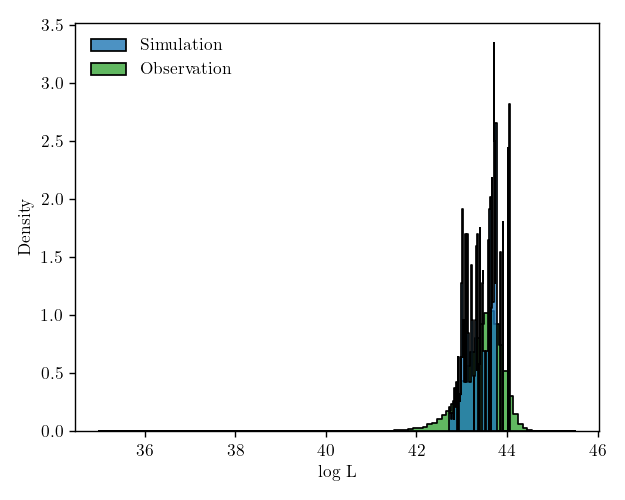

In [113]:
data2.loc[:, 'log L'] = data2['L rel to sun'].map(np.log10)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
img = histplot(Data, ax=ax,stat='density',bins=100,alpha=0.8, label='Simulation',element='step',ec='black')
histplot(data2['log L'], ax = ax, bins=100, stat='density', zorder=-10, color='C2',label='Observation',
         element='step',ec='black')
ax.legend(frameon=False,loc=2)
#ax.set_xlim([40, 45])
plt.tight_layout()

In [107]:
fig.savefig('simulation.pdf')